In [5]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

paths_to_root_file_list = ["/global/homes/r/rmastand/dimuonAD/file_sources/CMS_Run2016H_DoubleMuon_NANOAOD_UL2016_MiniAODv2_NanoAODv9-v1_2510000_file_index.txt"]

path_to_root_input= "/pscratch/sd/r/rmastand/dimuonAD/preskimmed_root_2016_30555/"



In [2]:


list_of_root_files = []
for path in paths_to_root_file_list:
    with open(path, "r") as infile:
        root_file_list = infile.readlines()
        list_of_root_files += root_file_list
        
        

In [3]:

muon_mass = 0.1056583755 # GeV

def assemble_m_inv(a_M, a_pt, a_eta, a_phi, b_M, b_pt, b_eta, b_phi):
    # computes system of mother particle
    
    a_E = np.sqrt(a_M**2 + (a_pt*np.cosh(a_eta))**2)
    b_E = np.sqrt(b_M**2 + (b_pt*np.cosh(b_eta))**2)

    a_px = a_pt*np.cos(a_phi)
    b_px = b_pt*np.cos(b_phi)

    a_py = a_pt*np.sin(a_phi)
    b_py = b_pt*np.sin(b_phi)

    a_pz = a_pt*np.sinh(a_eta)
    b_pz = b_pt*np.sinh(b_eta)

    mother_E = a_E + b_E
    mother_px = a_px + b_px
    mother_py = a_py + b_py
    mother_pz = a_pz + b_pz

    mother_M = np.sqrt(mother_E**2 - mother_px**2 - mother_py**2 - mother_pz**2)
    mother_pt = np.sqrt(mother_px**2 + mother_py**2)
    mother_eta = np.arcsinh(mother_pz/mother_pt)
    mother_phi = np.arctan(mother_py/mother_px)
    

    return mother_M, mother_pt, mother_eta, mother_phi




28
Analyzing file 0 /pscratch/sd/r/rmastand/dimuonAD/preskimmed_root_2016_30555/127C2975-1B1C-A046-AABF-62B77E757A86.root


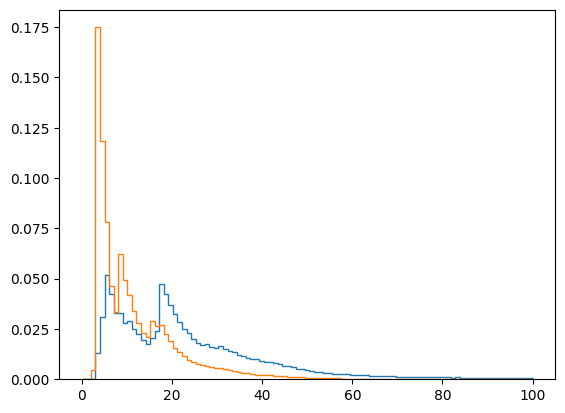

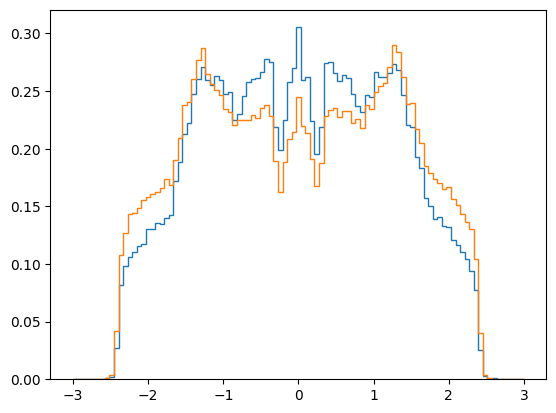

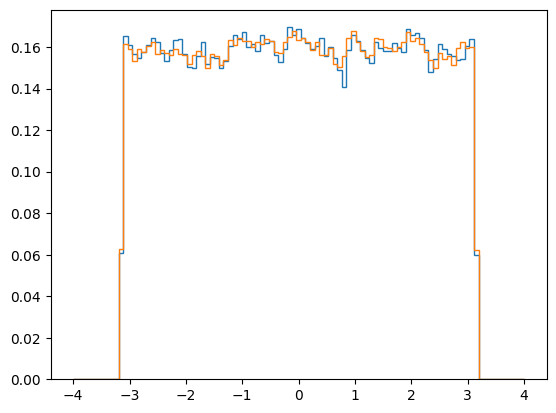

/tmp/ipykernel_2353597/1206068675.py:23: RuntimeWarning: invalid value encountered in sqrt
  mother_M = np.sqrt(mother_E**2 - mother_px**2 - mother_py**2 - mother_pz**2)


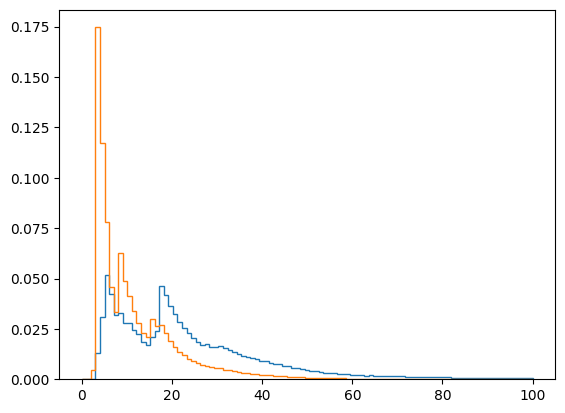

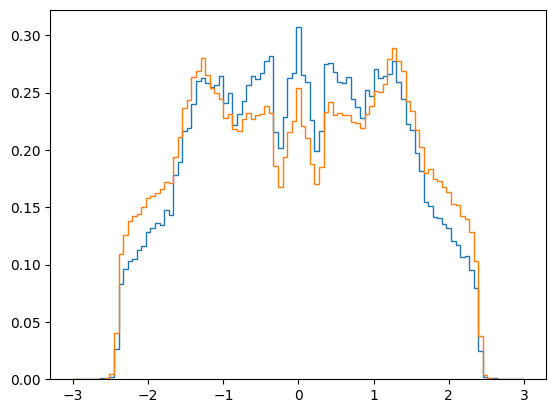

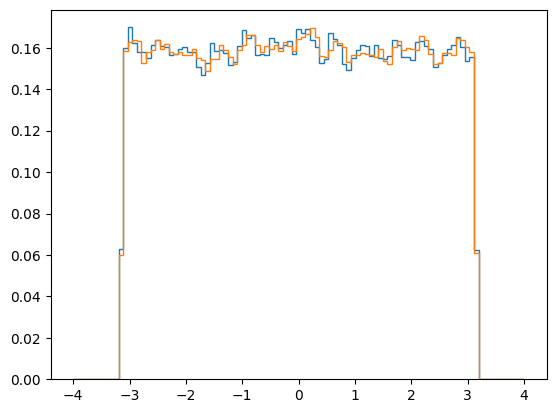

Analyzing file 1 /pscratch/sd/r/rmastand/dimuonAD/preskimmed_root_2016_30555/183BFB78-7B5E-734F-BBF5-174A73020F89.root


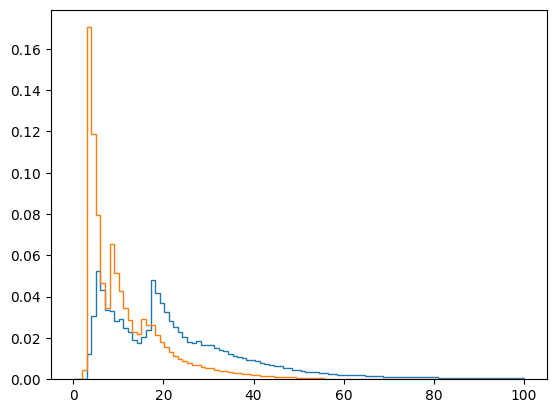

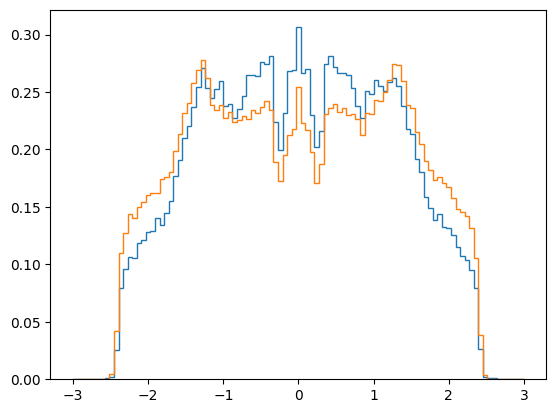

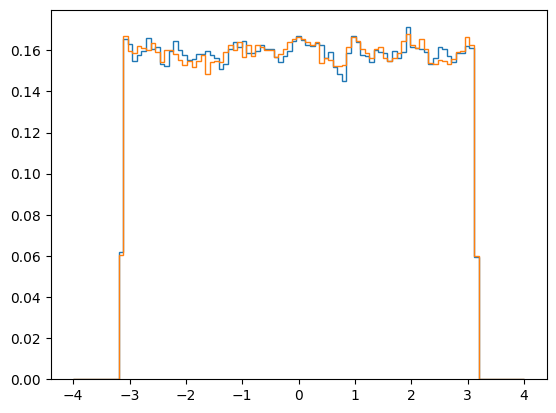

KeyboardInterrupt: 

In [4]:

all_dimu_masses_mm,all_dimu_masses_pp  = [], []
        
print(len(list_of_root_files))
        
for i in range(0, 28):
    
    loc_root_file_string = path_to_root_input+list_of_root_files[i].strip().split("/")[-1]

    print("Analyzing file", i, loc_root_file_string)

    loc_root_file = uproot.open(loc_root_file_string)
    events = loc_root_file["Events;1"]

    # only store the muons for now
    muon_vars = ["Muon_pt", "Muon_eta", "Muon_phi", "Muon_charge", "Muon_pfRelIso03_all", "Muon_pfRelIso04_all"]
    #jet_vars = ["Jet_pt", "Jet_eta", "Jet_phi", "Jet_mass", "Jet_nConstituents", "Jet_btagCSVV2", "Jet_btagDeepB", "Jet_btagDeepFlavB"]
    
    all_muon_data, filtered_muon_data, filtered_amuon_data = {}, {}, {}
    #all_jet_data, filtered_jet_data = {}, {}
    for mv in muon_vars:
        all_muon_data[mv] = events[mv].array()
    #for jv in jet_vars:
    #    all_jet_data[jv] = events[jv].array()

    # make filters for the muons, amuons
    loc_muon_filter = all_muon_data["Muon_charge"] == -1
    loc_amuon_filter = all_muon_data["Muon_charge"] == 1

    loc_num_muon = np.sum(loc_muon_filter, axis = 1)
    loc_num_amuon = np.sum(loc_amuon_filter, axis = 1)
    
    # double muon
    double_mu_filter = loc_num_muon >= 2
    double_mu_pt = all_muon_data["Muon_pt"][loc_muon_filter][double_mu_filter]
    mu0_pt = [xx[0] for xx in double_mu_pt]
    mu1_pt = [xx[1] for xx in double_mu_pt]
    double_mu_eta = all_muon_data["Muon_eta"][loc_muon_filter][double_mu_filter]
    mu0_eta = [xx[0] for xx in double_mu_eta]
    mu1_eta = [xx[1] for xx in double_mu_eta]
    double_mu_phi = all_muon_data["Muon_phi"][loc_muon_filter][double_mu_filter]
    mu0_phi = [xx[0] for xx in double_mu_phi]
    mu1_phi = [xx[1] for xx in double_mu_phi]
    
    
    plt.figure()
    plt.hist(mu0_pt, density = True, bins = np.linspace(0, 100, 100), histtype = "step")
    plt.hist(mu1_pt, density = True, bins = np.linspace(0, 100, 100), histtype = "step")
    plt.show()
    
    plt.figure()
    plt.hist(mu0_eta, density = True, bins = np.linspace(-3, 3, 100), histtype = "step")
    plt.hist(mu1_eta, density = True, bins = np.linspace(-3, 3, 100), histtype = "step")
    plt.show()
    
    plt.figure()
    plt.hist(mu0_phi, density = True, bins = np.linspace(-4, 4, 100), histtype = "step")
    plt.hist(mu1_phi, density = True, bins = np.linspace(-4, 4, 100), histtype = "step")
    plt.show()
    
    
    dimu_M, dimu_pt, dimu_eta, dimu_phi = assemble_m_inv(muon_mass, mu0_pt, mu0_eta, mu0_phi, 
                                                       muon_mass, mu1_pt, mu1_eta, mu1_phi)
    
    all_dimu_masses_mm.append(dimu_M)
    
        
    # double amuon
    double_amu_filter = loc_num_amuon >= 2
    double_mu_pt = all_muon_data["Muon_pt"][loc_amuon_filter][double_amu_filter]
    mu0_pt = [xx[0] for xx in double_mu_pt]
    mu1_pt = [xx[1] for xx in double_mu_pt]
    double_mu_eta = all_muon_data["Muon_eta"][loc_amuon_filter][double_amu_filter]
    mu0_eta = [xx[0] for xx in double_mu_eta]
    mu1_eta = [xx[1] for xx in double_mu_eta]
    double_mu_phi = all_muon_data["Muon_phi"][loc_amuon_filter][double_amu_filter]
    mu0_phi = [xx[0] for xx in double_mu_phi]
    mu1_phi = [xx[1] for xx in double_mu_phi]
    
    
    plt.figure()
    plt.hist(mu0_pt, density = True, bins = np.linspace(0, 100, 100), histtype = "step")
    plt.hist(mu1_pt, density = True, bins = np.linspace(0, 100, 100), histtype = "step")
    plt.show()
    
    plt.figure()
    plt.hist(mu0_eta, density = True, bins = np.linspace(-3, 3, 100), histtype = "step")
    plt.hist(mu1_eta, density = True, bins = np.linspace(-3, 3, 100), histtype = "step")
    plt.show()
    
    plt.figure()
    plt.hist(mu0_phi, density = True, bins = np.linspace(-4, 4, 100), histtype = "step")
    plt.hist(mu1_phi, density = True, bins = np.linspace(-4, 4, 100), histtype = "step")
    plt.show()
    
    dimu_M, dimu_pt, dimu_eta, dimu_phi = assemble_m_inv(muon_mass, mu0_pt, mu0_eta, mu0_phi, 
                                                       muon_mass, mu1_pt, mu1_eta, mu1_phi)
    
    all_dimu_masses_pp.append(dimu_M)
    


In [ ]:
a = [[1, 1, 1], [2, 2], [3, 3,3, 3]]

In [ ]:
b = np.hstack(a)
print(b)